In [35]:
# import library
import pymoo
from pymoo.model.problem import Problem
import pandas
import pycaret
import numpy as np
import math
import matplotlib.pyplot as plt

from pycaret.regression import load_model

In [73]:
# load ML data

ML_data = pandas.read_csv("./NSGA2_data_2021_08_12_v2_N1000.csv")

In [74]:
# load simulation data

sim_data = pandas.read_csv("./simulation_data_2021_08_12_v2_N1000.csv")

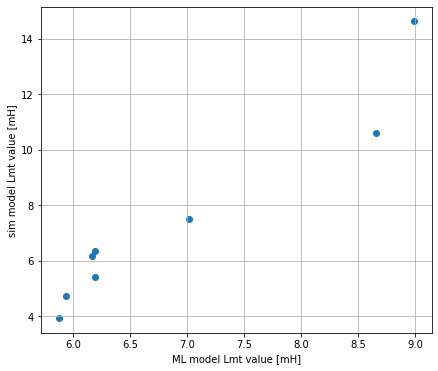

In [81]:
Lmt_ML = ML_data["Lmt"]
Lmt_sim = sim_data["Lmt"]


plt.scatter(Lmt_ML, Lmt_sim)

plt.xlabel("ML model Lmt value [mH]")
plt.ylabel("sim model Lmt value [mH]")
plt.grid(True)


#plt.plot([5,25], [5,25], 'k-')

plt.rcParams["figure.figsize"] = (7,6)

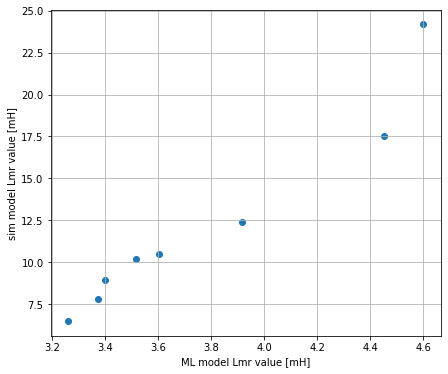

In [76]:
Lmr_ML = ML_data["Lmr"]
Lmr_sim = sim_data["Lmr"]


plt.scatter(Lmr_ML, Lmr_sim)

plt.xlabel("ML model Lmr value [mH]")
plt.ylabel("sim model Lmr value [mH]")
plt.grid(True)

#plt.plot([5,25], [5,25], 'k-')

plt.rcParams["figure.figsize"] = (7,6)

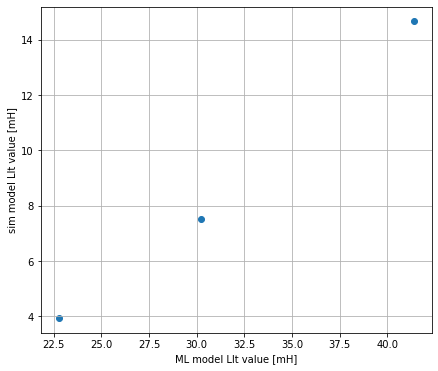

In [25]:
Llt_ML = ML_data["Llt"]
Llt_sim = sim_data["Llt"]


plt.scatter(Llt_ML, Llt_sim)

plt.xlabel("ML model Llt value [mH]")
plt.ylabel("sim model Llt value [mH]")
plt.grid(True)

#plt.plot([5,25], [5,25], 'k-')

plt.rcParams["figure.figsize"] = (7,6)

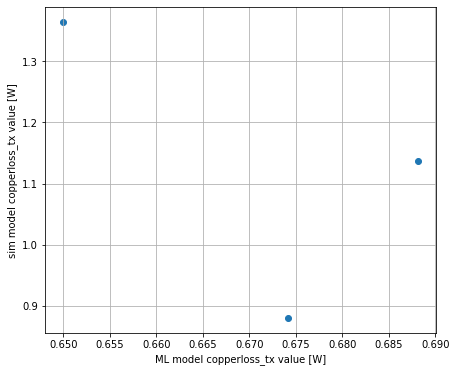

In [26]:
copperloss_tx_ML = ML_data["copperloss_tx"]
copperloss_tx_sim = sim_data["copperloss_tx"]


plt.scatter(copperloss_tx_ML, copperloss_tx_sim)

plt.xlabel("ML model copperloss_tx value [W]")
plt.ylabel("sim model copperloss_tx value [W]")
plt.grid(True)

#plt.plot([1,2], [1,2], 'k-')

plt.rcParams["figure.figsize"] = (7,6)

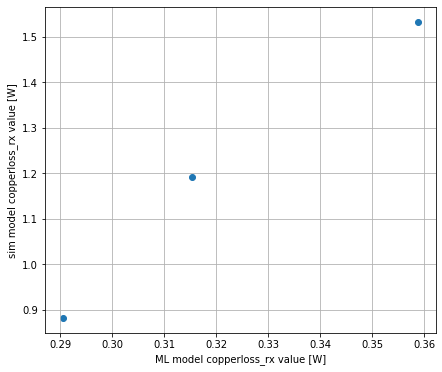

In [27]:
copperloss_rx_ML = ML_data["copperloss_rx"]
copperloss_rx_sim = sim_data["copperloss_rx"]


plt.scatter(copperloss_rx_ML, copperloss_rx_sim)

plt.xlabel("ML model copperloss_rx value [W]")
plt.ylabel("sim model copperloss_rx value [W]")
plt.grid(True)

#plt.plot([0.7,1.4], [0.7,1.4], 'k-')

plt.rcParams["figure.figsize"] = (7,6)

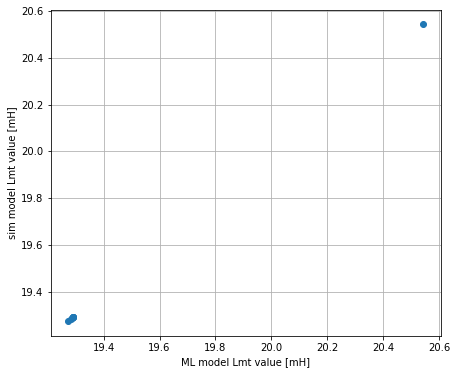

In [77]:
l1_ML = ML_data["l2"]
l1_sim = sim_data["l2"]


plt.scatter(l1_ML, l1_sim)

plt.xlabel("ML model Lmt value [mH]")
plt.ylabel("sim model Lmt value [mH]")
plt.grid(True)

#plt.plot([5,25], [5,25], 'k-')

plt.rcParams["figure.figsize"] = (7,6)

In [155]:
ML_model_Lmt = load_model("../ML_model2_v3_2021_08_12_v2_Lmt") # Lmt model
ML_model_Lmr = load_model("../ML_model2_v3_2021_08_12_v2_Lmr") # Lmr model
ML_model_Llt = load_model("../ML_model2_v3_2021_08_12_v1_Llt") # Llt model
ML_model_Llr = load_model("../ML_model2_v3_2021_08_12_v1_Llr") # Llr model
ML_model_R1 = load_model("../ML_model2_v3_2021_08_12_v1_R1") # R1 model
ML_model_R2 = load_model("../ML_model2_v3_2021_08_12_v1_R2") # R2 model

ML_model_Lmtc = load_model("../ML_model2_v3_2021_08_12_v1_Lmt_c") # Lmt model
ML_model_Lmrc = load_model("../ML_model2_v3_2021_08_12_v1_Lmr_c") # Lmr model
ML_model_Lltc = load_model("../ML_model2_v3_2021_08_12_v1_Llt_c") # Llt model
ML_model_Llrc = load_model("../ML_model2_v3_2021_08_12_v1_Llr_c") # Llr model
ML_model_R1c = load_model("../ML_model2_v3_2021_08_12_v1_R1_c") # R1 model
ML_model_R2c = load_model("../ML_model2_v3_2021_08_12_v1_R2_c") # R2 model

Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded


In [156]:
# parameter calcaultion

sol_copperloss_tx = np.zeros(len(ML_data))
sol_copperloss_rx = np.zeros(len(ML_data))
sol_coreloss = np.zeros(len(ML_data))

freq = np.zeros(len(ML_data))
N1 = np.zeros(len(ML_data))
N2 = np.zeros(len(ML_data))
Lmt = np.zeros(len(ML_data))
Lmr = np.zeros(len(ML_data))
Llt = np.zeros(len(ML_data))
Llr = np.zeros(len(ML_data))
R1 = np.zeros(len(ML_data))
R2 = np.zeros(len(ML_data))
l1 = np.zeros(len(ML_data))
l2 = np.zeros(len(ML_data))
h1 = np.zeros(len(ML_data))
w1 = np.zeros(len(ML_data))

mag_current = np.zeros(len(ML_data))
Req = np.zeros(len(ML_data))
flux = np.zeros(len(ML_data))
B = np.zeros(len(ML_data))
V_core = np.zeros(len(ML_data))

I1 = 4.36
I2 = 3.17

core_temp = 70

core_a = 0.6942
core_x = 1.4472
core_y = 2.4769
core_b = 4.7948
core_c = 0.0684
core_d = 4e-4
core_LT = core_b - core_c*core_temp + core_d*core_temp**2


for i in range(0,len(ML_data)) :

    param2 = ML_data.loc[[i],:]
    #param2 = pandas.DataFrame(param,columns=["N1","N2","d1","d2","freq","move_tx","move_rx","offset_tx","offset_rx","per","space1","space2","space3","space4","space5","space6","l1", "l2", "h1", "w1", "I1", "I2"])

    N2[i] = ML_data["N2"][i]
    N1[i] = ML_data["N1"][i]
    freq[i] = ML_data["freq"][i]
    l1[i] = ML_data["I1"][i]*1e-3
    l2[i] = ML_data["I2"][i]*1e-3
    h1[i] = ML_data["h1"][i]*1e-3
    w1[i] = ML_data["w1"][i]*1e-3
    
    V1 = 459.2

    Lmt[i] = ML_model_Lmt.predict(param2)[0]*1e-3
    Lmr[i] = ML_model_Lmr.predict(param2)[0]*1e-3


    Llt[i] = ML_model_Llt.predict(param2)[0]*1e-6
    Llr[i] = ML_model_Llr.predict(param2)[0]*1e-6

    R1[i] = ML_model_R1.predict(param2)[0]
    R2[i] = ML_model_R2.predict(param2)[0]
    
    mag_current[i] = V1/(2*3.141592*freq[i])/Lmt[i]
    Req[i] = N1[i]**2/Lmt[i]
    flux[i] = N1[i] * mag_current[i]/Req[i]
    B[i] = flux[i] / (2*w1[i]*l1[i])
    V_core[i] = ((h1[i] + 2*l1[i])*(4*l1[i]+2*l2[i])*(w1[i]) - 2*l2[i]*h1[i]*w1[i]) # Core volue [unit : m^3]
    sol_coreloss[i] = core_a * freq[i]**core_x * B[i]**core_y * core_LT * V_core[i] # coreloss [unit : W]

    sol_copperloss_tx[[i]] = ML_model_R1.predict(param2)[0] * I1**2
    sol_copperloss_rx[[i]] = ML_model_R2.predict(param2)[0] * I2**2

In [84]:
param2 = ML_data.loc[[0],:]
ML_model_Lmt.predict(param2)[0]*1e-3
ML_model_Lmr.predict(param2)[0]*1e-3

0.0034065469518759265

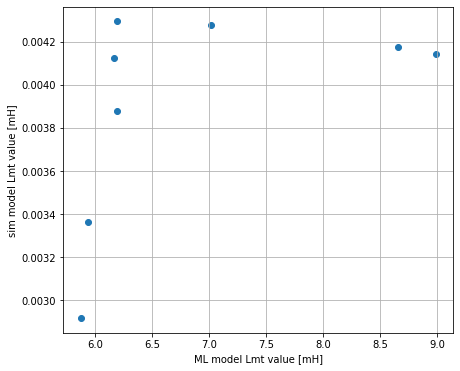

In [85]:
Lmt_ML = ML_data["Lmt"]
Lmt_ML2 = Lmt


plt.scatter(Lmt_ML, Lmt_ML2)

plt.xlabel("ML model Lmt value [mH]")
plt.ylabel("sim model Lmt value [mH]")
plt.grid(True)


#plt.plot([5,25], [5,25], 'k-')

plt.rcParams["figure.figsize"] = (7,6)

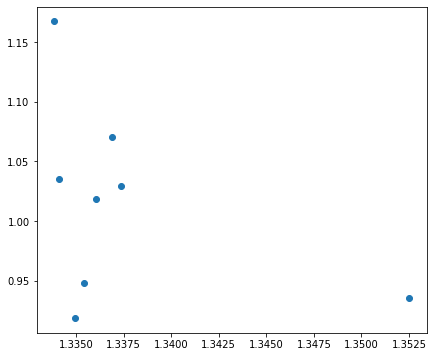

In [86]:
plt.scatter(N2/N1, Lmr/Lmt)

In [162]:
param = [[14, 18, 1.63, 1.63, 40000, 2.3, 2.42, 3.96, -1.28, 3500, 3.88, 13.15, 4.55, 9.46, 2.3, 2.34, 20, 40, 30.7, 30, 3.93, 6.5]]
param2 = pandas.DataFrame(param,columns=["N1","N2","d1","d2","freq","move_tx","move_rx","offset_tx","offset_rx","per","space1","space2","space3","space4","space5","space6","l1", "l2", "h1", "w1", "I1", "I2"])


Lmts = ML_model_Lmt.predict(param2)[0]*1e-3
Lmrs = ML_model_Lmr.predict(param2)[0]*1e-3



In [158]:
Lmts*1e+3

5.762140693918392

In [161]:
Lmrs*1e+3

3.1887546091535572

In [163]:
(18/14)**2

1.6530612244897962

In [164]:
(Lmrs/Lmts)

1.714037892364214